Hàm số tổng quát hồi quy tuyến tính:
$$y\approx f(x)=\widehat{y}$$
$$f(x)=w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}+w_{0}$$
Trong đó: $w_0, w_1, w_2,...,w_n$ là các hằng số, $w_0$ là thiên kiến (bias). Mối quan hệ giữa $y$ và $f(x)$ là mối quan hệ tuyến tính.

Hàm chi phí:
$$L(w)=\frac{1}{n}\sum_{i=1}^{n}\left ( y_i - \widehat{y} \right )^{2}$$

Giả nghịch đảo (Pseudo inverse):
$$w=(\overline{X}^{\top }\overline{X})^{\dagger }\overline{X}^{\top}y$$

#Ví dụ 1
[https://machinelearningcoban.com/2016/12/28/linearregression/](https://machinelearningcoban.com/2016/12/28/linearregression/)

| Chiều cao (cm) | Cân nặng (kg) | Chiều cao (cm) | Cân nặng (kg) |
| --- | --- | --- | --- |
| 147 | 49 | 168 | 60 |
| 150 | 50 | 170 | 72|
| 153 | 51 | 173 | 63 |
| 155 | 52 | 175 | 64 |
| 158 | 54 | 178 | 66 |
| 160 | 56 | 180 | 67 |
| 163 | 58 | 183 | 68 |
| 165 | 59 |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Ma trận chuyển vị (transpose), chuyển ma trận ngang sang ma trận dọc
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
print('Đầu vào: \n', X)
print('Đầu ra: \n', y)

Đầu vào: 
 [[147]
 [150]
 [153]
 [158]
 [163]
 [165]
 [168]
 [170]
 [173]
 [175]
 [178]
 [180]
 [183]]
Đầu ra: 
 [[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]


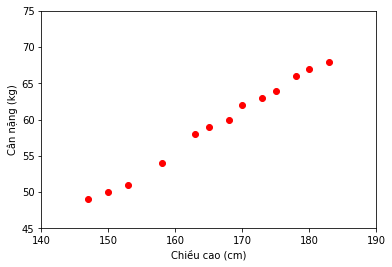

In [ ]:
# Vẽ đồ thị điểm
plt.plot(X, y, 'ro')
# Chia tỉ lệ trục tung và trục hoành
# x_min, x_max, y_min, y_max
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

- Các điểm sắp xếp gần như một đường thẳng, suy ra mô hình áp dụng là Hồi quy tuyến tính
- Mô hình Hồi quy tuyến tính trong bài toán này có dạng như sau:
$$y_{(kg)} =w_0 + w_1x_{(cm)}$$

In [ ]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
print(Xbar)

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [ ]:
# Xác định các hệ số
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
# Tính giả nghịch đảo pinv
w = np.dot(np.linalg.pinv(A), b)
w_0 = w[0][0]
w_1 = w[1][0]
print('w_0 = ', w_0)
print('w_1 = ', w_1)
print(f'Phương trình đường thẳng: f(x) = {w_0} + {w_1}x')

w_0 =  -33.735410206298184
w_1 =  0.5592049619425978
Phương trình đường thẳng: f(x) = -33.735410206298184 + 0.5592049619425978x


- `np.arange()` tạo ra các giá trị có khoảng cách đều trong một khoảng nhất định trong Numpy. Các giá trị được sinh ra nằm trong khoảng [start, stop). Tham số hàm: 
` np.arange([start,] stop[, step,], dtype=None)`
- `np.linspace()` cũng tương tự như arange nhưng nó truyền vào số lượng mẫu (num) thay vì kích thước của step như arange. Tham số hàm:
` np.linspace(start, stop, num=50, endpoint=True, retstep=False)`

In [ ]:
# Tìm đường thẳng tuyến tính theo phương trình đường thẳng đã tìm được
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1 * x0

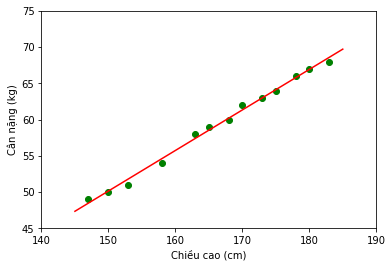

In [ ]:
# Vẽ đường thẳng tuyến tính
plt.plot(X, y, 'go')
plt.plot(x0, y0, color = 'red')
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

In [ ]:
# Định nghĩa hàm f(x)
def f(x):
    return x*w_1 + w_0

In [ ]:
print( u'Một người cao 176 cm dự đoán cân nặng là %.2f (kg)' %(f(176)))
print( u'Một người cao 179 cm dự đoán cân nặng là %.2f (kg)' %(f(179)))

Một người cao 176 cm dự đoán cân nặng là 64.68 (kg)
Một người cao 179 cm dự đoán cân nặng là 66.36 (kg)


In [ ]:
# Định nghĩa hàm mất mát
def cost():
    sum = 0
    for i in range(len(X)):
        sum += np.abs(y[i] - f(X[i])) ** 2
    return (1 / len(X)) * sum

In [ ]:
print('Hàm mất mát của mô hình hồi quy tuyến tính tìm được là: ', cost())

Hàm mất mát của mô hình hồi quy tuyến tính tìm được là:  [0.21835354]


# Ví dụ 2
[https://towardsdatascience.com/simple-linear-regression-from-scratch-in-numpy-871335e14b7a](https://towardsdatascience.com/simple-linear-regression-from-scratch-in-numpy-871335e14b7a)

In [ ]:
X = (np.arange(1, 301).reshape(300, 1))
y = np.random.normal(X + 2, 50).reshape(300, 1)


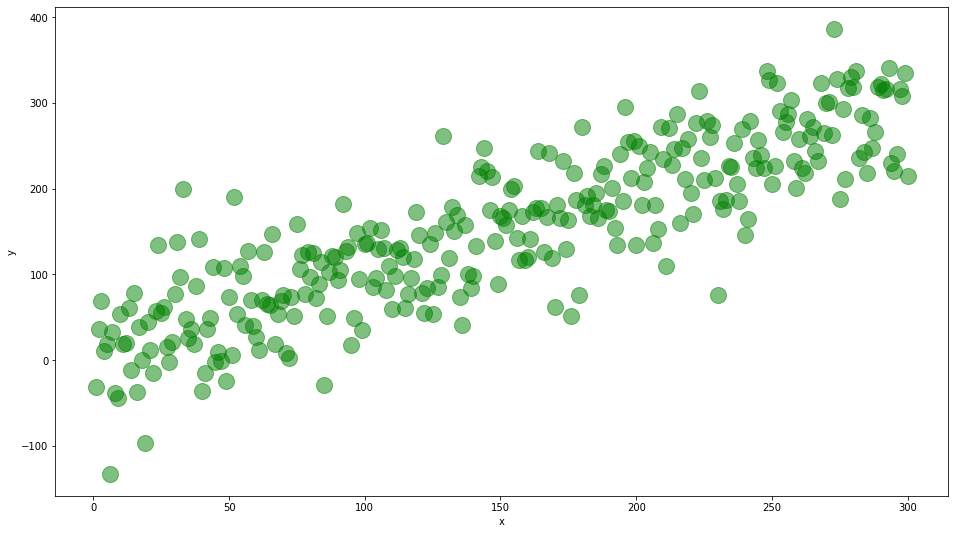

In [ ]:
plt.figure(figsize = (16, 9))
plt.scatter(X, y, s = 256, color = 'green', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

In [ ]:
# Xác định các hệ số
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
# Tính giả nghịch đảo pinv
w = np.dot(np.linalg.pinv(A), b)
w_0 = w[0][0]
w_1 = w[1][0]
print('w_0 = ', w_0)
print('w_1 = ', w_1)
print(f'Phương trình đường thẳng: f(x) = {w_0} + {w_1}x')

w_0 =  8.33438240091391
w_1 =  0.9626820389080484
Phương trình đường thẳng: f(x) = 8.33438240091391 + 0.9626820389080484x


In [ ]:
# Tìm đường thẳng tuyến tính theo phương trình đường thẳng đã tìm được
x0 = np.linspace(0, 300, 2)
y0 = w_0 + w_1 * x0

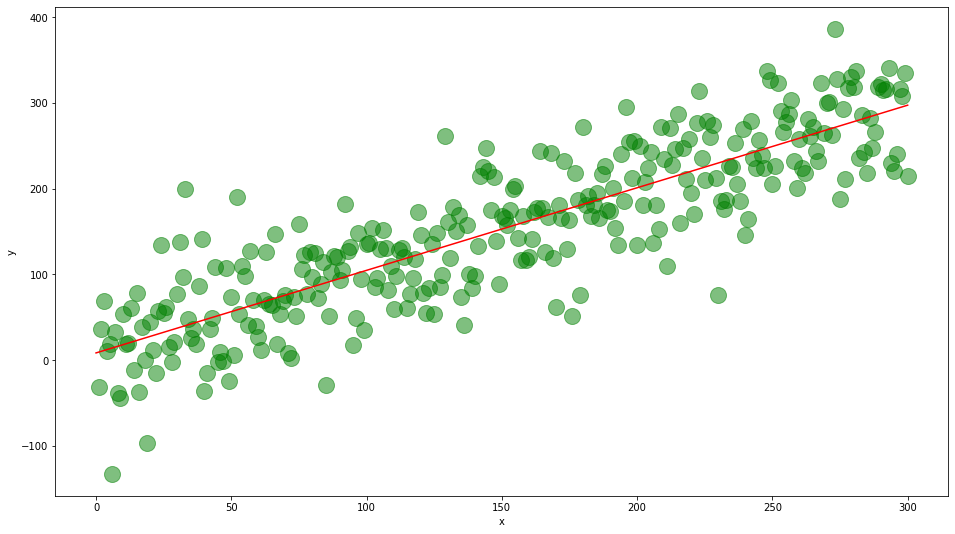

In [ ]:
# Vẽ đường thẳng tuyến tính
plt.figure(figsize = (16, 9))
plt.scatter(X, y, s = 256, color = 'green', alpha = 0.5)
plt.plot(x0, y0, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Định nghĩa hàm f(x)
def f(x):
    return x*w_1 + w_0

In [ ]:
# Định nghĩa hàm mất mát
def loss():
    sum = 0
    for i in range(len(X)):
        sum += np.abs(y[i] - f(X[i])) ** 2
    return (1 / len(X)) * sum

In [ ]:
print('Hàm mất mát của mô hình hồi quy tuyến tính tìm được là: ', cost())

Hàm mất mát của mô hình hồi quy tuyến tính tìm được là:  [2454.242101]
